In [30]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [37]:
dataframe = read_csv('C:/Users/PC1/Downloads/archive/Shopify.csv',usecols=[1] )

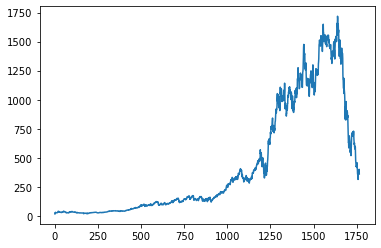

In [38]:
plt.plot(dataframe)

In [39]:
#Convert pandas dataframe to numpy array
dataset = dataframe.values
dataset = dataset.astype('float32') #COnvert values to float

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-20,17.000000,17.000000,17.000000,17.000000,17.000000,0.0
2015-05-21,28.000000,28.740000,24.110001,25.680000,25.680000,12303900.0
2015-05-22,26.070000,31.100000,26.000000,28.309999,28.309999,2841200.0
2015-05-23,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-05-19,362.160004,413.700012,360.500000,391.329987,391.329987,7601800.0
2022-05-20,400.690002,403.989990,340.010010,363.850006,363.850006,5660700.0
2022-05-21,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Normalization is optional but recommended for neural network as certain 
# activation functions are sensitive to magnitude of numbers. 
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

In [41]:
#We cannot use random way of splitting dataset into train and test as
#the sequence of events is important for time series.
#So let us take first 60% values for train and the remaining 1/3 for testing
# split into train and test sets
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [43]:
#Use TimeseriesGenerator to organize training data into the right format
#We can use a generator instead......
from keras.preprocessing.sequence import TimeseriesGenerator # Generates batches for sequence data
seq_size = length =  10 
batch_size = 1
train_generator = TimeseriesGenerator(train,train,length=length,batch_size=batch_size)
print("Total number of samples in the original training data = ", len(train)) # 95
print("Total number of samples in the generated data = ", len(train_generator)) # 55
#With length 40 it generated 55 samples, each of length 40 (by using data of length 95)


Total number of samples in the original training data =  1165
Total number of samples in the generated data =  1155


In [44]:
# print a couple of samples... 
x, y = train_generator[0]

In [45]:
#Also generate validation data
validation_generator = TimeseriesGenerator(test, test, length=length ,batch_size=batch_size)

In [46]:
#Input dimensions are... (N x seq_size)
num_features = 1 #Univariate example

In [47]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length, num_features)))
model.add(LSTM(50, activation='relu'))
#model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()
print('Train...')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
Train...


In [48]:
model.fit_generator(generator=train_generator, verbose=2, epochs=100, validation_data=validation_generator)


C:\Users\PC1\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
1155/1155 - 12s - loss: 2.5275e-04 - val_loss: 0.0039
Epoch 2/100
1155/1155 - 8s - loss: 7.1705e-05 - val_loss: 0.0054
Epoch 3/100
1155/1155 - 8s - loss: 6.9462e-05 - val_loss: 0.0022
Epoch 4/100
1155/1155 - 8s - loss: 5.8623e-05 - val_loss: 0.0046
Epoch 5/100
1155/1155 - 8s - loss: 5.1190e-05 - val_loss: 0.0024
Epoch 6/100
1155/1155 - 8s - loss: 5.5124e-05 - val_loss: 0.0158
Epoch 7/100
1155/1155 - 8s - loss: 3.9265e-05 - val_loss: 0.0013
Epoch 8/100
1155/1155 - 7s - loss: 4.0007e-05 - val_loss: 0.0015
Epoch 9/100
1155/1155 - 8s - loss: 4.0630e-05 - val_loss: 0.0024
Epoch 10/100
1155/1155 - 8s - loss: 3.8267e-05 - val_loss: 0.0032
Epoch 11/100
1155/1155 - 8s - loss: 3.3743e-05 - val_loss: 0.0059
Epoch 12/100
1155/1155 - 8s - loss: 3.2717e-05 - val_loss: 0.0062
Epoch 13/100
1155/1155 - 8s - loss: 2.8280e-05 - val_loss: 0.0031
Epoch 14/100
1155/1155 - 8s - loss: 2.9222e-05 - val_loss: 0.0076
Epoch 15/100
1155/1155 - 8s - loss: 2.4096e-05 - val_loss: 0.0067
Epoch 16/100
1155/

In [50]:
trainPredict = model.predict(train_generator)
testPredict = model.predict(validation_generator)

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform(train)
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform(test)

In [51]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_inverse[length:], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_inverse[length:], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 5.46 RMSE
Test Score: 425.32 RMSE


In [52]:
# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[length:len(trainPredict)+length, :] = trainPredict

In [53]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
#testPredictPlot[len(trainPredict)+(seq_size*2)-1:len(dataset)-1, :] = testPredict
testPredictPlot[len(train)+(length)-1:len(dataset)-1, :] = testPredict

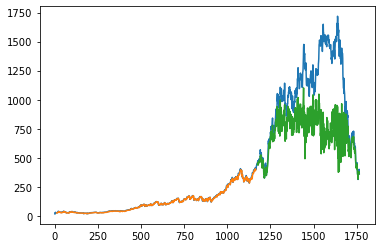

In [54]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()